             user_id   merchant_id         label       item_id        cat_id  \
count   31824.000000  31824.000000  31824.000000  3.182400e+04  31824.000000   
mean   117121.824189   2874.635684      0.169715  5.537354e+05    872.487211   
std    120343.984846   1550.165607      0.375388  3.220121e+05    463.433310   
min     18306.000000     66.000000      0.000000  2.000000e+00      2.000000   
25%     18306.000000   1425.000000      0.000000  2.779730e+05    429.000000   
50%     38787.000000   2928.000000      0.000000  5.547530e+05    821.000000   
75%    225666.000000   4427.000000      0.000000  8.262680e+05   1280.000000   
max    423042.000000   4992.000000      1.000000  1.112891e+06   1671.000000   

          seller_id      brand_id   action_type     age_range        gender  \
count  31824.000000  31824.000000  31824.000000  31824.000000  31824.000000   
mean    2337.699284   4140.029443      0.248492      3.351087      0.987494   
std     1518.849873   2347.828431      0.7

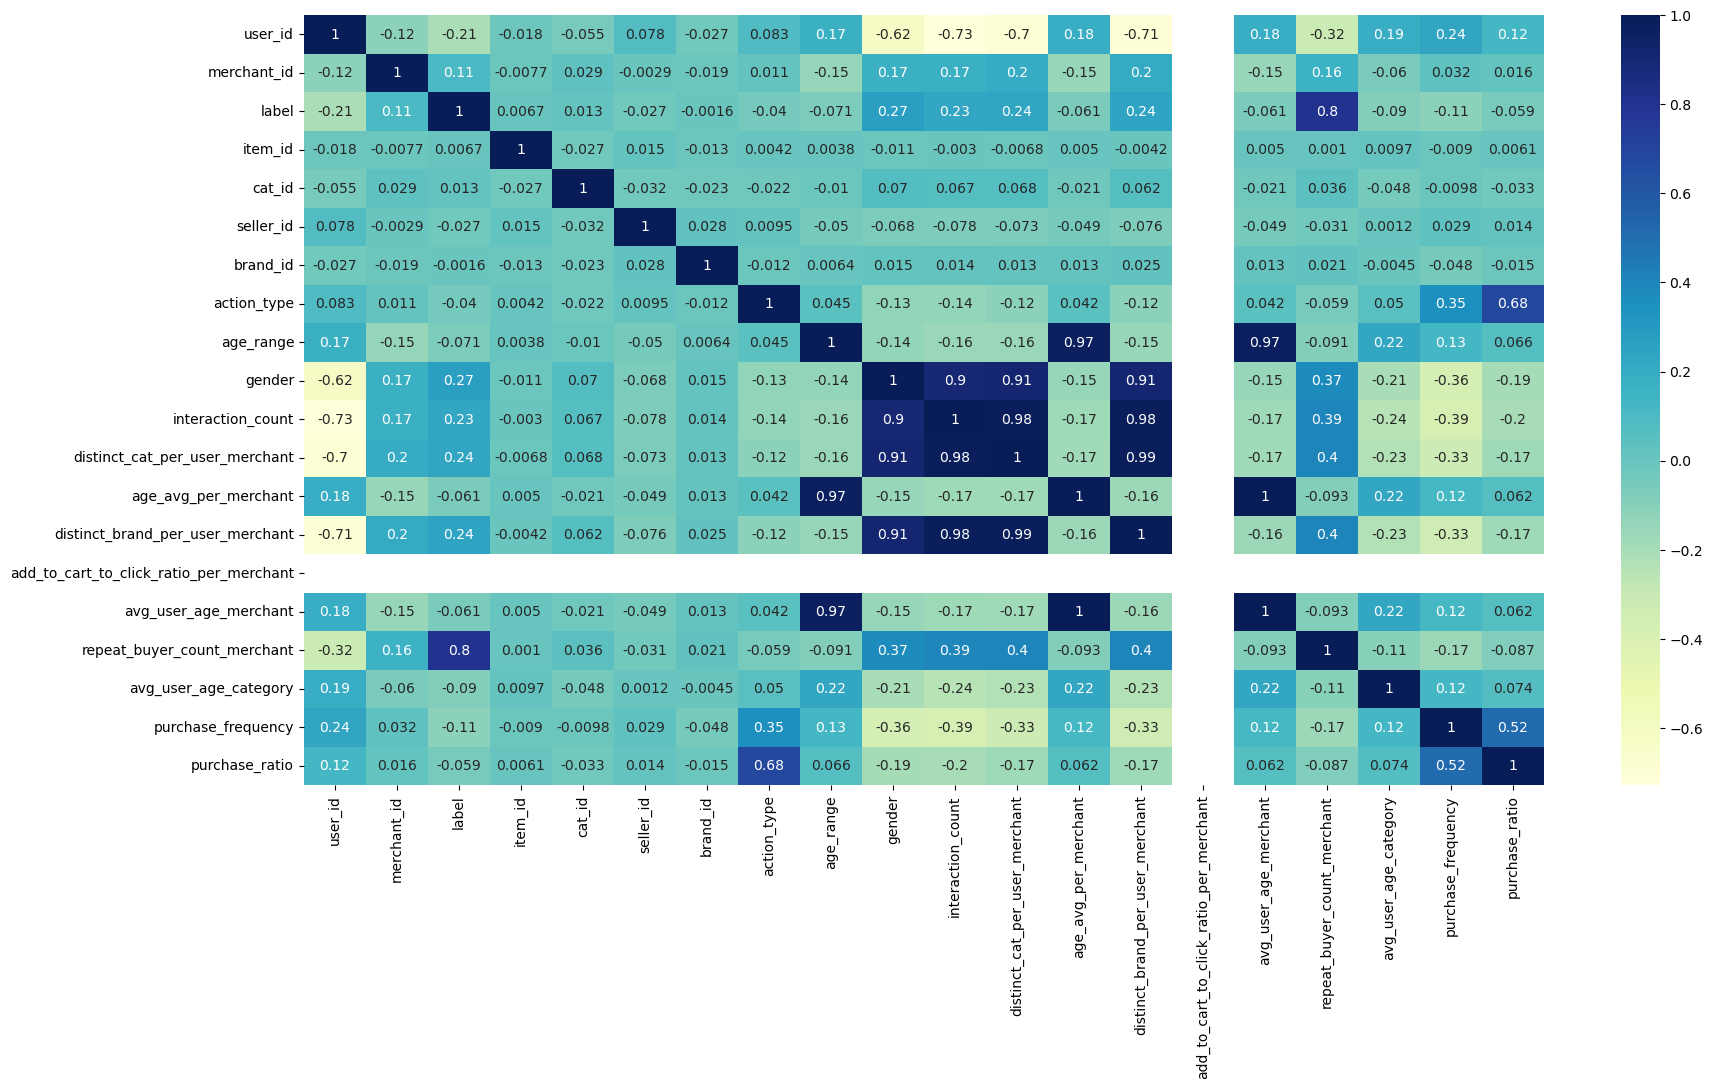

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data
data = pd.read_csv('feature_Engineered_train.csv')

# Summary statistics
print(data.describe())

# Feature ranking using correlation
corr = data.corr()
corr_label = abs(corr['label'])
important_features = corr_label[corr_label > 0.1].index.tolist()
print('Important features:', important_features)



fig, ax = plt.subplots(figsize=(20,10))
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,)

# displaying heatmap
plt.show()
# Feature ranking using SHAP (example)
# shap_values = shap.TreeExplainer(model).shap_values(data)
# shap.summary_plot(shap_values, data)



In [14]:
# PCA for feature reduction
scaler = StandardScaler()
X = data.drop(['user_id', 'merchant_id', 'label'], axis=1)
X = data.drop(['purchase_average_time','time_stamp'], axis=1)
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
explained_variances = pca.explained_variance_ratio_
print('Explained variances:', explained_variances)
cumulative_variances = np.cumsum(explained_variances)
print('Cumulative variances:', cumulative_variances)
print(X_scaled)



Explained variances: [2.82396479e-01 1.46687554e-01 9.82524057e-02 7.78774452e-02
 5.57596843e-02 5.34512636e-02 5.11271626e-02 5.05144545e-02
 4.88036089e-02 4.58333993e-02 3.20493803e-02 2.28243729e-02
 1.51636921e-02 1.03501870e-02 5.63096320e-03 1.89531101e-03
 7.37058362e-04 6.45577146e-04 3.42258235e-33 9.08547772e-38]
Cumulative variances: [0.28239648 0.42908403 0.52733644 0.60521388 0.66097357 0.71442483
 0.765552   0.81606645 0.86487006 0.91070346 0.94275284 0.96557721
 0.9807409  0.99109109 0.99672205 0.99861736 0.99935442 1.
 1.         1.        ]
[[ 1.89114356 -0.67712261 -0.45211199 ... -1.88944132 -0.59306096
  -0.48582363]
 [ 1.89114356 -0.67712261 -0.45211199 ... -1.88944132 -0.59306096
  -0.48582363]
 [ 1.89114356 -0.67712261 -0.45211199 ...  0.00866241 -0.59306096
  -0.48582363]
 ...
 [-0.59349827  0.75435985 -0.45211199 ...  1.71147726  0.63862744
   1.46926629]
 [-0.59349827  0.75435985 -0.45211199 ...  0.32352064  0.63862744
   0.73610757]
 [-0.59349827  0.7543598